# pandas - outliers

In [5]:
import pandas as pd
import seaborn as sns

abaloneFile = "./dataset/abalone.parquet"
dfAbalone = pd.read_parquet(abaloneFile)

In [7]:
print(dfAbalone.head(3).transpose())

                     0       1        2
length          0.4350  0.5850   0.6550
diameter        0.3350  0.4500   0.5100
height          0.1100  0.1250   0.1600
whole_weight    0.3340  0.8740   1.0920
shucked_weight  0.1355  0.3545   0.3960
viscera_weight  0.0775  0.2075   0.2825
shell_weight    0.0965  0.2250   0.3700
age             7.0000  6.0000  14.0000


## identify

In [13]:
# understand outliers
# outliers -> check Δ(median, mean)
# histogram -> see the tails

dfAbaloneStats = dfAbalone.describe(include="all")

print(dfAbaloneStats)

            length     diameter       height  whole_weight  shucked_weight  \
count  3320.000000  3320.000000  3320.000000   3320.000000     3320.000000   
mean      0.522693     0.406575     0.139271      0.824734        0.357705   
std       0.121164     0.100120     0.042708      0.491182        0.222223   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.345000     0.115000      0.436375        0.181500   
50%       0.540000     0.425000     0.140000      0.795250        0.335500   
75%       0.615000     0.480000     0.165000      1.150000        0.504500   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight          age  
count     3320.000000   3320.000000  3320.000000  
mean         0.180162      0.237921     9.896988  
std          0.110182      0.140261     3.205654  
min          0.000500      0.001500     1.000000  
25%          0.092000      0.127375     8.

array([[<Axes: xlabel='length', ylabel='length'>,
        <Axes: xlabel='diameter', ylabel='length'>,
        <Axes: xlabel='height', ylabel='length'>,
        <Axes: xlabel='whole_weight', ylabel='length'>,
        <Axes: xlabel='shucked_weight', ylabel='length'>,
        <Axes: xlabel='viscera_weight', ylabel='length'>,
        <Axes: xlabel='shell_weight', ylabel='length'>,
        <Axes: xlabel='age', ylabel='length'>],
       [<Axes: xlabel='length', ylabel='diameter'>,
        <Axes: xlabel='diameter', ylabel='diameter'>,
        <Axes: xlabel='height', ylabel='diameter'>,
        <Axes: xlabel='whole_weight', ylabel='diameter'>,
        <Axes: xlabel='shucked_weight', ylabel='diameter'>,
        <Axes: xlabel='viscera_weight', ylabel='diameter'>,
        <Axes: xlabel='shell_weight', ylabel='diameter'>,
        <Axes: xlabel='age', ylabel='diameter'>],
       [<Axes: xlabel='length', ylabel='height'>,
        <Axes: xlabel='diameter', ylabel='height'>,
        <Axes: xlabel='hei

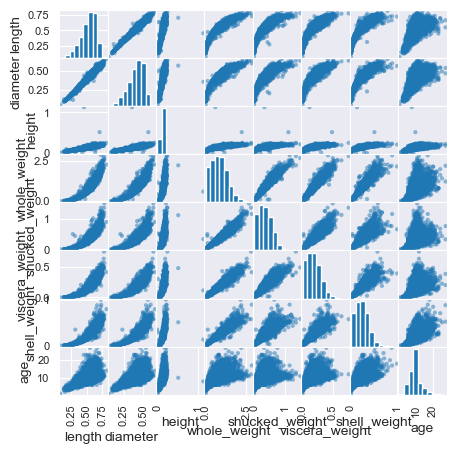

In [28]:
# histogram -> see tails
# there are outliers

pd.plotting.scatter_matrix(frame=dfAbalone, figsize=(5,5))
# sns.pairplot(data=dfAbalone, height=3)

## handle

In [ ]:
# handle outliers
# 1- IQM
# 2- Anomaly detection


### IQR - inter quartile range

In [39]:
def find_outliers(df):
    q1 = df.quantile(q=0.25)
    q3 = df.quantile(q=0.75)

    iqr = q3 - q1

    lower = q1 - iqr * 1.5
    upper = q3 + iqr * 1.5

    # filtering
    # select non outlier
    # rest will be filled null
    outliers = df[(df > lower) & (df < upper)]

    return outliers.dropna()

dfAbaloneNonOutliers = find_outliers(dfAbalone)

print(dfAbaloneNonOutliers.size, dfAbalone.size)

24096 26560


### Anomaly Detection